<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Linear_Regression_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Vamos considerar para título de entimento, os pontos abaixo
import pandas as pd

dados = pd.DataFrame( 
                     { 'X' : [ 1, 2, 3, 4, 5 ] ,
                       'Y' : [ 1.3, 1.8, 3.5, 4, 4.6 ] }
                    )

dados.head()

,X,Y
0,1,1.3
1,2,1.8
2,3,3.5
3,4,4.0
4,5,4.6


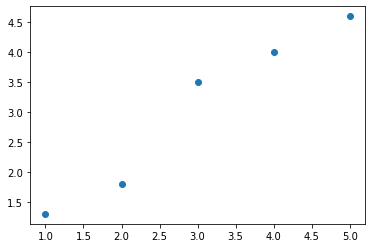

In [23]:
# Visualizando os pontos graficamente
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter( dados.X, dados.Y )

plt.show()

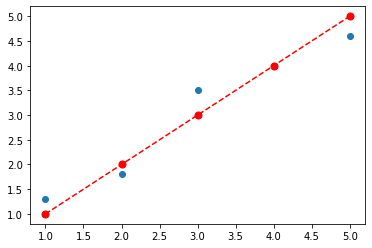

In [24]:
# Desenhando uma reta utilizando X = Y
dados['y_reta'] = dados.X

fix, ax = plt.subplots()

ax.scatter( dados.X, dados.Y )
ax.plot( dados.X, dados.y_reta, '--r' )
ax.scatter( dados.X, dados.y_reta, s=50, color='red' )

plt.show()

In [25]:
# Importando a regressão Linear
from sklearn.linear_model import LinearRegression

modelo = LinearRegression().fit( dados.X.values.reshape(-1, 1), dados.Y )

In [26]:
# Visualizando o coeficiente angular
modelo.coef_

array([0.88])

In [27]:
# Visualizando o coeficoente linear
modelo.intercept_

0.40000000000000036

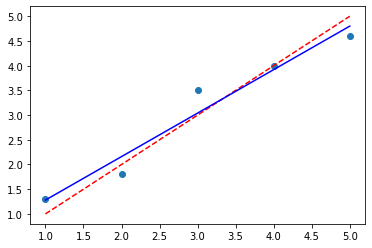

In [28]:
# y = ax + b

a = modelo.coef_[0]
b = modelo.intercept_

fix, ax = plt.subplots()

ax.scatter( dados.X, dados.Y )
ax.plot( dados.X, dados.y_reta, '--r' )
ax.plot( dados.X, ( a * dados.X + b ), '-b'  )
# ax.scatter( dados.X, dados.y_reta, s=50, color='red' )

plt.show()

In [29]:
# Fazenao a Previsão e adicionando na base
dados['y_predito'] = modelo.predict( dados.X.values.reshape( -1, 1 ) )
dados

,X,Y,y_reta,y_predito
0,1,1.3,1,1.28
1,2,1.8,2,2.16
2,3,3.5,3,3.04
3,4,4.0,4,3.92
4,5,4.6,5,4.80


In [30]:
# Calculando o erro da reta VERMELHA e da REGRESSÃO
dados['erro'] = ( dados.Y - dados.y_reta ) ** 2
dados['erro_regressao'] = ( dados.Y - dados.y_predito ) ** 2
dados

,X,Y,y_reta,y_predito,erro,erro_regressao
0,1,1.3,1,1.28,0.09,0.0004
1,2,1.8,2,2.16,0.04,0.1296
2,3,3.5,3,3.04,0.25,0.2116
3,4,4.0,4,3.92,0.00,0.0064
4,5,4.6,5,4.80,0.16,0.0400


In [31]:
# Verificando qual tem o MENOR erro MÉDIO
dados[ ['erro', 'erro_regressao']].mean()

erro              0.1080
erro_regressao    0.0776
dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print( mean_squared_error( dados.Y, dados.y_reta ) )
print( mean_squared_error( dados.Y, dados.y_predito ) )

print( mean_absolute_error( dados.Y, dados.y_reta ) )
print( mean_absolute_error( dados.Y, dados.y_predito ) )

0.10800000000000005
0.07760000000000003
0.2800000000000001
0.22400000000000003


## **Regressão Linear na prática**

In [33]:
from sklearn.datasets import fetch_california_housing

casas = fetch_california_housing()
casas

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [34]:
# Transformando para um DataFrame do pandas

# casas.feature_names contem todas as futures ( X )
dados = pd.DataFrame( casas.data, columns=casas.feature_names )

# Pegar o target ( y )
dados['MedHouseVal'] = casas.target

display( dados.head() )

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## **Regressão Linear Simples**

In [35]:
X = dados.MedInc
y = dados.MedHouseVal

### **Separar o dataset em treino e teste**

In [46]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size=0.33, random_state = 42 )

# Usando a regressão linear
modelo = LinearRegression()
modelo.fit( X_treino.values.reshape( -1, 1 ), y_treino  )

LinearRegression()

In [53]:
# Avaliando o erro
predicao = modelo.predict( X_teste.values.reshape( -1, 1 ) )

print( 'Erro Médio Absoluto = {0}'.format( mean_absolute_error( y_teste, predicao ) ) )
print( 'Erro Médio Quadrado = {0}'.format( mean_squared_error( y_teste, predicao ) ) )

Erro Médio Absoluto = 0.6265986453094171
Erro Médio Quadrado = 0.7028461448540977


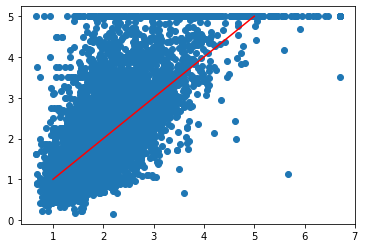

In [57]:
# Visualizando os dados
fig, ax = plt.subplots()

ax.scatter( predicao, y_teste )
ax.plot( [1,5], [1,5], '-r')
plt.show()

## **Regressão Linear Múltipla**

In [59]:
dados.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [61]:
# Separando X e y
X = dados.drop( 'MedHouseVal', axis= 1 )
y = dados['MedHouseVal']

In [65]:
# Separando em treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split( X, y, test_size = 0.33, random_state = 42 )

In [66]:
# Usando a Regressão Linear
modelo = LinearRegression()
modelo.fit( X_treino, y_treino )

predicao = modelo.predict( X_teste )

In [67]:
# Obtendo os coeficientes
modelo.coef_

array([ 4.44870466e-01,  9.55004561e-03, -1.21991503e-01,  7.79144696e-01,
       -7.68990809e-08, -3.29948505e-03, -4.19131153e-01, -4.34103468e-01])

In [68]:
# Obtendo os interceptos
modelo.intercept_

-37.082010939079986

In [69]:
# Avaliando o erro
print( 'Erro Médio Absoluto = {0}'.format( mean_absolute_error(predicao, y_teste ) ) )
print( 'Erro Médio Quadrado = {0}'.format( mean_squared_error( predicao, y_teste ) ) )

Erro Médio Absoluto = 0.5295710106684446
Erro Médio Quadrado = 0.5369686543372453


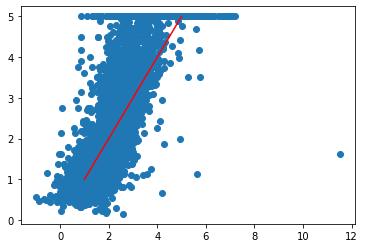

In [71]:
# Visualizando os dados
fig, ax = plt.subplots()

ax.scatter( predicao, y_teste )
ax.plot( [1,5], [1,5], '-r')

plt.show()